In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *

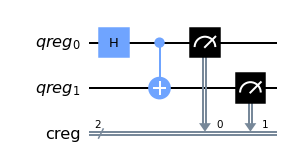

In [21]:
#define the number of qubits - width
width = 2

#define the number of qubits - depth
depth = 5  

# define a quantum register with two qubits
q =  QuantumRegister(width,"qreg")

# define a classical register with one bit
# it stores the measurement result of the quantum part
c = ClassicalRegister(width,"creg")

# define our quantum circuit
qc = QuantumCircuit(q,c)

qc.h(0)
qc.cx(0,1)

# measure the first qubit, and store the result in the first classical bit
qc.measure(q,c)

# draw the circuit by using matplotlib
qc.draw(output='mpl') # re-run the cell if the figure is not displayed

In [22]:
x = qc.depth()
print(x)

3


Run it on Simulator

{'00': 4991, '11': 5009}



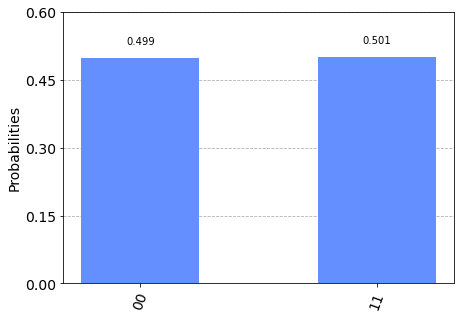

In [23]:
# execute the circuit 10000 times in the local simulator

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

# we can show the result by using histogram
print()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [24]:
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

provider = IBMQ.get_provider("ibm-q")
#using this tool to monitor our position in queue
from qiskit.tools.monitor import job_monitor

#choose real device
backend = provider.get_backend('ibmq_lima')

ibmqfactory.load_account:WARNING:2021-06-23 11:42:24,431: Credentials are already in use. The existing account in the session will be replaced.


Show the transpiled circuit depth. The transpiled circuit is the circuit that will be run on the real quantum device.

In [25]:
qc_transpiled = transpile(qc, backend)
print("The TRANSPILED circuit depth is:", qc_transpiled.depth())


The TRANSPILED circuit depth is: 5


In [29]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

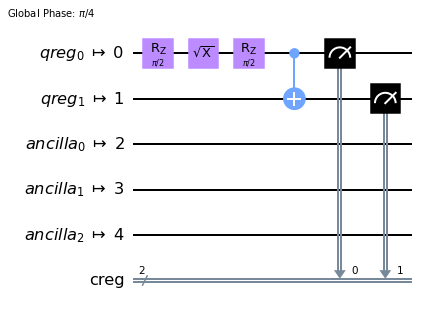

In [26]:
qc_transpiled.draw(output='mpl')

In [27]:
shots = 1024
job = execute(qc, backend= backend, shots= shots)
job_monitor(job)

Job Status: job has successfully run


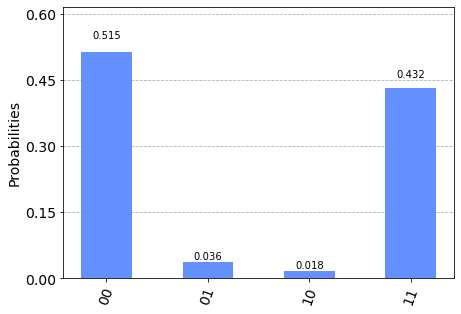

In [28]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)